In [4]:
from __future__ import print_function                  # Allows for python3 printing
import keras
from keras.datasets import cifar100                    # import function to load cifar100 dataset
from keras.models import Model
from keras.layers import Input, Dense, Activation, Flatten,Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras import optimizers

/Users/hongxing/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [6]:
y_train[:10]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1],
       [86],
       [90],
       [28],
       [23],
       [31]])

the shape of training data is: (50000, 32, 32, 3) (50000, 1)
the shape of testing data is: (10000, 32, 32, 3) (10000, 1)
the range of features is: 0 to 255
the range of labels is: 0 to 99
label 1 is [19]
label 2 is [29]
label 3 is [0]
label 4 is [11]
label 5 is [1]


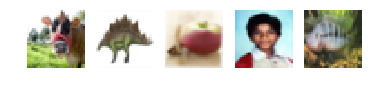

In [7]:
print ('the shape of training data is:',x_train.shape,y_train.shape)       #print data shape
print ('the shape of testing data is:',x_test.shape,y_test.shape)

import numpy as np
print ('the range of features is:',np.min(x_train),'to',np.max(x_train))
print ('the range of labels is:',np.min(y_train),'to',np.max(y_train))

import matplotlib.pyplot as plt
% matplotlib inline
for i in range(5):
    image = x_train[i]
    plt.subplot(1,5, i+1)
    #image = image.reshape(64,64)
    print ('label', i+1, 'is',y_train[i])
    plt.imshow(image, cmap='Greys')
    plt.axis('off')

In [8]:
# convert class vectors to binary class matrices
x_train = x_train/255.0
x_test = x_test/255.0
y_train = keras.utils.to_categorical(y_train[:,0], num_classes=100)
y_test = keras.utils.to_categorical(y_test[:,0], num_classes=100)

In [9]:
def ConvNet(num_classes=100):

    images = Input(shape=(32, 32, 3))           #use input shape that matches image size
    
    # Convolutional layers
    x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(images)  #conv layer1
    x = Dropout(0.25)(x)                     #dropout layer1
    
    x = Conv2D(filters=64, kernel_size=(2, 2), activation='relu')(x)   #conv layer2
    x = MaxPooling2D(pool_size=(2, 2))(x)  #pooling layer2
    x = Dropout(0.5)(x)                     #dropout layer1

    # Fully-connected layer: 
    x = Flatten()(x)          
    x = Dense(200)(x)         #200 neurons fc layer
    x = Dense(units=num_classes, activation='softmax')(x)

    # Instantiate a model based on inputs/outputs
    model = Model(inputs=images, outputs=x)

    # Configure the model for training. 
    model.compile(
            loss='categorical_crossentropy',
            optimizer=optimizers.Adam(),
            metrics=[
                'categorical_accuracy',
                keras.metrics.top_k_categorical_accuracy])

    return model

In [13]:
model = ConvNet()
model.fit(
        x=x_train,
        y=y_train,
        epochs=30,
        shuffle=True)

Epoch 1/30
50000/50000 [==============================] - 120s 2ms/step - loss: 3.4926 - categorical_accuracy: 0.1826 - top_k_categorical_accuracy: 0.4283
Epoch 2/30
50000/50000 [==============================] - 117s 2ms/step - loss: 2.8086 - categorical_accuracy: 0.3104 - top_k_categorical_accuracy: 0.6045
Epoch 3/30
50000/50000 [==============================] - 118s 2ms/step - loss: 2.4927 - categorical_accuracy: 0.3750 - top_k_categorical_accuracy: 0.6741
Epoch 4/30
50000/50000 [==============================] - 116s 2ms/step - loss: 2.2386 - categorical_accuracy: 0.4248 - top_k_categorical_accuracy: 0.7298
Epoch 5/30
50000/50000 [==============================] - 118s 2ms/step - loss: 2.0343 - categorical_accuracy: 0.4704 - top_k_categorical_accuracy: 0.7667
Epoch 6/30
50000/50000 [==============================] - 126s 3ms/step - loss: 1.8547 - categorical_accuracy: 0.5054 - top_k_categorical_accuracy: 0.7999
Epoch 7/30
50000/50000 [==============================] - 126s 3ms/ste

NameError: name 'joblib' is not defined

In [17]:
train_score = model.evaluate(x_train, y_train)       # evaluate model on training dataset
test_score = model.evaluate(x_test, y_test)          # evaluate model on testing dataset

print ('\n')                                         # start from a new line      
print('Training accuracy:', train_score[1])          # print out training accuracy
print('Testing accuracy:', test_score[1])            # print out testing accuracy

10000/10000 [==============================] - 8s 827us/step


Training accuracy: 0.96256
Testing accuracy: 0.3604


In [20]:
json_string = model.to_json()  
open('my_model_architecture.json','w').write(json_string)  
model.save_weights('my_model_weights.h5')  

In [13]:
model.save('model.h5')

NameError: name 'model' is not defined

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14400)             0         
__________

In [14]:
from keras.models import load_model
model = load_model('model.h5')

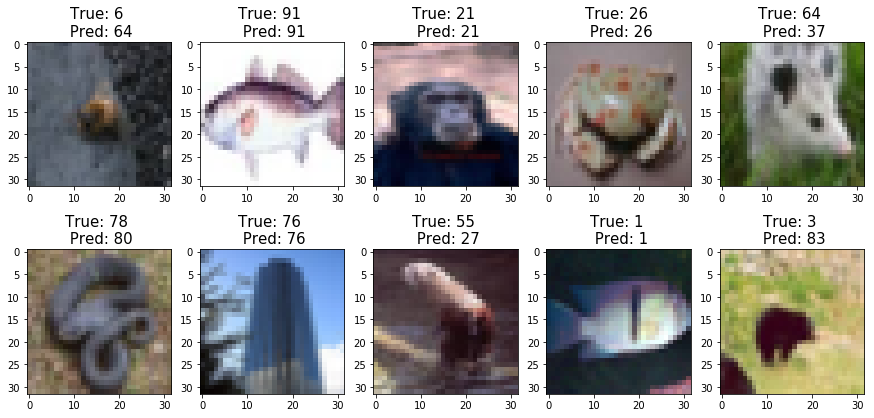

In [15]:
import numpy as np
rand_id = np.random.choice(range(10000), size=10)
X_pred = np.array([x_test[i] for i in rand_id])
y_true = [y_test[i] for i in rand_id]
y_true = np.argmax(y_true, axis=1)

y_pred = model.predict(X_pred)
y_pred = np.argmax(y_pred, axis=1)

plt.figure(figsize=(15, 7))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_pred[i].reshape(32, 32, 3), cmap='gray')
    plt.title('True: %s \n Pred: %s' % (y_true[i], y_pred[i]), size=15)
plt.show()
